# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()

# Fetch current ETH price

eth_request = requests.get(eth_url).json()

# Compute current value of my crpto
btc_value = btc_request['data']['1']['quotes']['USD']['price']
eth_value = eth_request['data']['1027']['quotes']['USD']['price']

my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23457.01
The current value of your 5.3 ETH is $7067.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
spyagg = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Reorganize the DataFrame
# Separate ticker data

spy = spyagg[spyagg['symbol']=='SPY'].drop('symbol', axis=1)
agg = spyagg[spyagg['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

spyagg = pd.concat([spy, agg], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
spyagg

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2022-10-17 04:00:00+00:00  363.99  367.9799  357.2808  366.82  92767845   

                                                     AGG                      \
                          trade_count        vwap   open  high    low  close   
timestamp                                                                      
2022-10-17 04:00:00+00:00      609962  365.954532  95.28  95.4  94.83  94.86   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2022-10-17 04:00:00+00:00  5455452       20841  95.037152

In [11]:
# Pick AGG and SPY close prices
spy_close_price = float(spyagg["SPY"]["close"])
agg_close_price = float(spyagg["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $366.82
Current AGG closing price: $94.86


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18341.00
The current value of your 200 AGG shares is $18972.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(
    {'amount' : [total_crypto, total_shares]},
    index = ['crypto', 'shares'])
    
# Display savings DataFrame
df_savings


,amount
crypto,30524.615
shares,37313.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

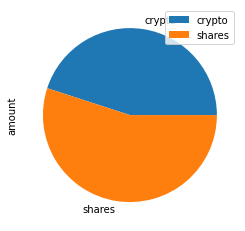

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health

if total_savings > emergency_fund:
    print("Congradulations! you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congradulations! you have reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund-total_savings} away from reaching your financial goal")

Congradulations! you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

spy_2 = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
agg_2 = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

df_stock_data = pd.concat([spy_2, agg_2], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_Sim.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\samco\NW\05-APIs\Module-5-Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000919,1.016376,0.993316,0.995130,0.994455,0.995717,0.985015,1.008736,0.976640,1.003764,...,0.991586,0.999927,1.002258,1.008628,0.996038,1.004368,1.014409,1.003082,1.000546,1.014329
2,0.985278,1.011008,0.990780,1.010916,0.992741,0.992985,0.990607,1.013144,0.975251,1.009180,...,0.994356,1.006619,1.016154,1.005977,0.988730,1.009294,1.014507,1.017281,0.996915,1.022299
3,0.978713,1.015578,0.994335,1.010076,0.985317,0.991044,0.983861,1.018905,0.976712,0.994211,...,0.999175,1.006596,1.019997,1.007600,0.991081,1.017883,1.025478,1.019658,1.006076,0.995011
4,0.990043,1.011188,0.999363,1.019373,0.984957,0.995288,0.987525,1.032626,0.979624,0.984986,...,1.002384,1.016215,1.010323,1.006493,0.992863,1.014368,1.025941,1.026690,1.000717,0.988562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.039237,10.049896,5.716823,12.789164,12.070431,7.108461,35.080913,8.911880,6.085818,12.055784,...,12.860981,7.240691,15.722119,8.686046,13.973210,25.590813,7.808506,22.035861,15.433089,20.508000
7557,42.980667,9.986740,5.726246,12.730315,12.008759,7.144960,35.092204,9.114118,6.118727,11.964574,...,12.944042,7.225485,15.848512,8.675945,14.129999,25.694582,7.796074,22.102064,15.451402,20.389309
7558,42.528092,9.942065,5.793410,12.734627,12.047262,7.134229,35.129951,9.199105,6.117944,11.878871,...,12.957515,7.164475,15.978310,8.708477,14.267210,25.486443,7.798530,22.208033,15.478644,20.449628
7559,43.039121,10.078285,5.800260,12.688487,12.119773,7.131834,34.981498,9.299245,6.038963,11.862715,...,12.796919,7.118850,16.099371,8.778432,14.350629,25.358710,7.858059,22.160399,15.265524,20.565998


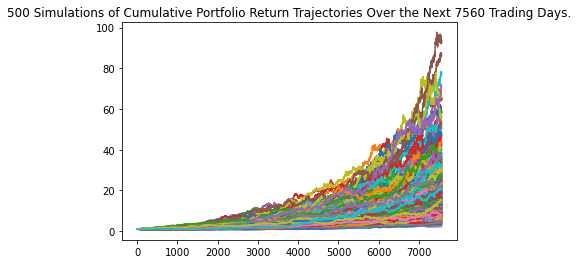

In [19]:
# Plot simulation outcomes
MC_Sim_plot = MC_Sim.plot_simulation()

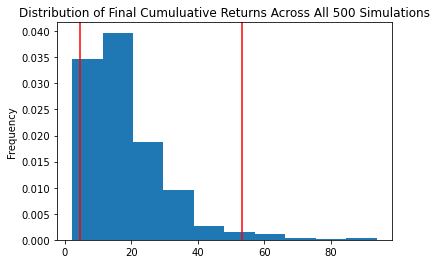

In [20]:
# Plot probability distribution and confidence intervals
MC_Sim_dist = MC_Sim.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Sim_tbl = MC_Sim.summarize_cumulative_return()

# Print summary statistics
print(MC_Sim_tbl)

count           500.000000
mean             18.474170
std              12.542314
min               2.163128
25%               9.905112
50%              15.504703
75%              22.992009
max              93.805385
95% CI Lower      4.429421
95% CI Upper     53.349899
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
MC_Sim_cil = round(MC_Sim_tbl[8]*initial_investment,2)
MC_Sim_ciu = round(MC_Sim_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC_Sim_cil} and ${MC_Sim_ciu}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88588.42 and $1066997.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
MC_Sim_cil2 = round(MC_Sim_tbl[8]*initial_investment2,2)
MC_Sim_ciu2 = round(MC_Sim_tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC_Sim_cil2} and ${MC_Sim_ciu2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132882.64 and $1600496.96


## Optional Challenge - Early Retirement 
### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Sim2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75, .25],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Sim2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\samco\NW\05-APIs\Module-5-Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007864,1.016973,1.002206,0.991124,1.006397,0.990920,0.987555,0.994126,1.002691,0.999854,...,1.000836,1.004368,1.005203,1.009610,1.005720,1.002275,1.013329,0.997213,1.003019,1.011230
2,0.992539,1.016078,0.995351,0.987064,0.996417,0.992526,0.985108,1.001935,1.011465,0.999814,...,1.027094,1.001920,1.002760,1.017951,0.999063,1.004603,1.009440,1.003064,1.012812,1.015521
3,1.006051,1.015432,0.999108,0.986683,0.981978,0.974427,0.985811,1.004860,1.032245,0.994400,...,1.037789,1.017301,1.009636,1.019904,0.991378,1.018853,1.008045,1.008851,1.008137,1.010893
4,1.005673,1.013455,1.004180,0.972566,0.986353,0.966021,0.993761,1.014427,1.042849,1.001718,...,1.045509,1.015407,1.020220,1.018737,0.985616,1.029966,1.004258,1.009010,1.007430,1.006587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.323105,1.358116,1.935590,2.244392,1.773693,1.873565,1.924954,2.533550,1.954327,2.472476,...,2.422709,1.224906,1.874982,2.396023,1.084398,2.060535,1.303378,1.555191,1.681350,1.529995
1257,1.328039,1.360627,1.934090,2.229334,1.760941,1.853076,1.901022,2.519319,1.941748,2.475429,...,2.418387,1.248493,1.876887,2.450299,1.079668,2.058037,1.296968,1.570777,1.655070,1.559506
1258,1.326481,1.360731,1.933778,2.220920,1.747258,1.863600,1.873035,2.492655,1.973604,2.447628,...,2.421210,1.247645,1.884605,2.475387,1.082018,2.073480,1.295723,1.595020,1.658419,1.538213
1259,1.324918,1.345699,1.952237,2.226025,1.730386,1.885439,1.872149,2.490691,1.954987,2.493148,...,2.428172,1.243871,1.847507,2.467142,1.070450,2.070531,1.291235,1.598744,1.663045,1.539935


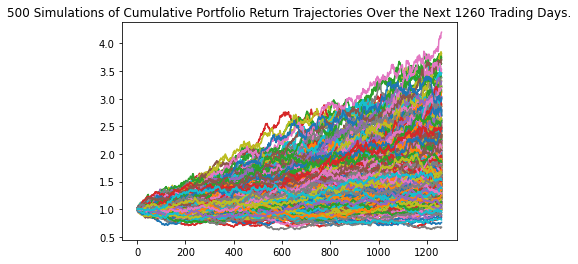

In [25]:
# Plot simulation outcomes
MC_Sim2_plot = MC_Sim2.plot_simulation()

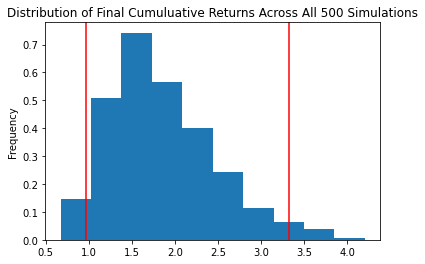

In [26]:
# Plot probability distribution and confidence intervals
MC_Sim2_dist = MC_Sim2.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Sim2_tbl = MC_Sim2.summarize_cumulative_return()

# Print summary statistics
print(MC_Sim2_tbl)

count           500.000000
mean              1.849274
std               0.607408
min               0.673820
25%               1.421646
50%               1.748674
75%               2.218756
max               4.202320
95% CI Lower      0.972240
95% CI Upper      3.319193
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment3 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
MC_Sim2_cil = round(MC_Sim2_tbl[8]*initial_investment3,2)
MC_Sim2_ciu = round(MC_Sim2_tbl[9]*initial_investment3,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${MC_Sim2_cil} and ${MC_Sim2_ciu}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19444.81 and $66383.87


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Sim3 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Sim3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\samco\NW\05-APIs\Module-5-Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000715,1.013573,0.978158,1.004011,0.991184,1.003469,1.005645,1.000418,1.015029,0.990206,...,1.004707,0.982790,1.009542,1.002326,1.013011,0.998761,0.993236,0.995042,1.011025,1.008879
2,1.006522,1.001377,0.988310,0.997287,0.984524,1.006301,1.008423,0.995263,1.013149,0.978078,...,1.006539,0.996303,1.004683,1.000659,1.003945,0.984136,0.990718,0.979791,1.010323,1.008821
3,1.014333,0.995192,0.979232,1.001698,0.982146,1.000131,1.005728,0.999562,1.015902,0.974388,...,1.018653,1.000767,1.001833,1.004180,0.998470,0.984270,1.000796,0.992324,1.001636,1.017432
4,0.998484,0.998768,0.976694,1.014791,0.981330,1.000080,1.007374,0.991372,1.023625,0.963326,...,1.021026,1.012362,1.003257,0.994275,1.005897,0.986546,0.998521,0.983041,1.009981,1.014525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.101564,2.383961,2.340363,2.442211,1.894827,1.047373,1.357265,1.638612,2.647112,2.249531,...,3.430381,6.066061,4.237126,1.350787,2.491752,1.366963,1.480677,1.278142,1.772837,2.323782
2517,2.133656,2.380934,2.347759,2.423595,1.897228,1.047696,1.367728,1.622073,2.625820,2.256450,...,3.416137,6.052000,4.244413,1.360949,2.493834,1.352545,1.489089,1.286916,1.767470,2.325655
2518,2.133799,2.388175,2.348900,2.389132,1.914819,1.048338,1.347974,1.612904,2.619587,2.260578,...,3.410790,6.051875,4.195611,1.369114,2.487601,1.350401,1.467859,1.276160,1.749324,2.352164
2519,2.151295,2.413435,2.361575,2.375622,1.913815,1.053948,1.339033,1.622018,2.627945,2.235063,...,3.400131,6.097754,4.194982,1.366510,2.502478,1.342290,1.473607,1.279567,1.744975,2.351415


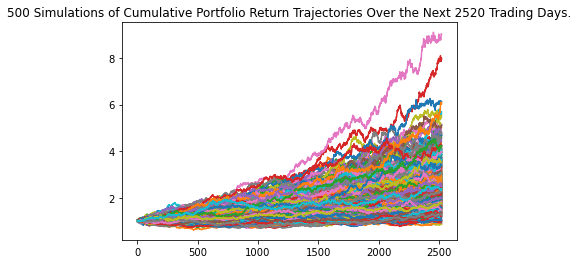

In [31]:
# Plot simulation outcomes
MC_Sim3_plot = MC_Sim3.plot_simulation()

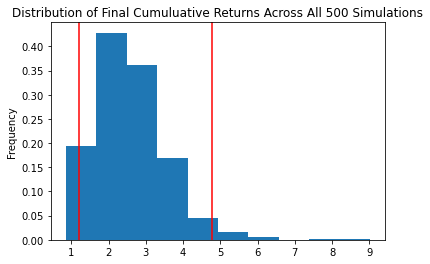

In [32]:
# Plot probability distribution and confidence intervals
MC_Sim3_dist = MC_Sim3.plot_distribution()


In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Sim3_tbl = MC_Sim3.summarize_cumulative_return()

# Print summary statistics
print(MC_Sim3_tbl)

count           500.000000
mean              2.579614
std               0.974329
min               0.852429
25%               1.937473
50%               2.458545
75%               3.014788
max               9.021939
95% CI Lower      1.193890
95% CI Upper      4.772222
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment4 = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
MC_Sim3_cil = round(MC_Sim3_tbl[8]*initial_investment4,2)
MC_Sim3_ciu = round(MC_Sim3_tbl[9]*initial_investment4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${MC_Sim3_cil} and ${MC_Sim3_ciu}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $47755.6 and $190888.9
